# Perceptron implementation

In [1]:
import numpy as np
class Perceptron(object):

  # eta - learning rate
  # n_iter - iteration number
  # random_state - random seed

  # w_ - weights after fitting
  # errors_ - errors numbers in each iteration

  def __init__(self, eta = 0.01, n_iter = 100, random_state =1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):                                                          # X = [n_samples, n_features]
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])       
                                                                                # import numpy as np
                                                                                # x = np.array([[1,2,3],[2,3,2],[4,2,1],[2,2,2]])
                                                                                # x.shape[1]
                                                                                # OT: 3
                                                                                # to create a matrix you need to use numpy's array method
                                                                                # shape method shows dimension of matrix. 

                                                                                #rgen = np.random.RandomState(1)
                                                                                # rgen.normal(loc= 0.0, scale = 0.01, size = 1+np.array([[1,2,2],[2,2,2],[3,5,2]]).shape[1])
                                                                                #OT: array([ 0.01624345, -0.00611756, -0.00528172, -0.01072969])
                                                                                #loc it's a mean, scale it is a minimum distance from the mean, in this case from 0
                                                                                #size - 
    self.errors_ = []
                                                                                #errors in single iteration
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
                                                                                #X = np.array([[1,2,3],[3,2,3],[1,1,1],[4,6,3]])
                                                                                # y = [1,2,9,5]
                                                                                # zip(X,y)
                                                                                # for i, j in zip(X,y):
                                                                                # print(i,'space',j)
                                                                                #OT: [1 2 3] space 1
                                                                                    # [3 2 3] space 2
                                                                                    # [1 1 1] space 9
                                                                                    # [4 6 3] space 5
                                                                                # zip concatenate two objects into a tuple
                                                                                #xi and target will be the iterators simultaneously go amond zip(X,y)
          update = self.eta * (target - self.predict(xi))
          self.w_[1:] += update * xi
          self.w_[0] += update
                                                                                # perceptron learnign rule: delta(w) = learning rate * (actual value - predicted value) * 
          errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
                                                                                # całkowite pobudzenie - z = w1x1 + ... + wmxm
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)                          
                                                                                # funkcja skoku jednostkowego / Heavside's function

In [2]:
import pandas as pd
df = pd.read_csv('iris_csv.csv', header = None)
df.tail()

,0,1,2,3,4
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
df.drop([0],inplace = True)

In [4]:
df.head()

,0,1,2,3,4
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Target values

In [5]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

## Learning vectors

In [ ]:
X = df.iloc[0:100, [0,2]].values
X = X.astype(np.float)
X

## Data exploration

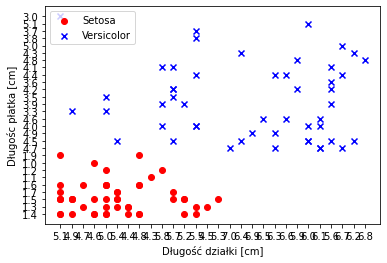

In [7]:
plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100,0], X[50:100,1], color = 'blue', marker = 'x', label = 'Versicolor')
plt.xlabel('Długość działki [cm]')
plt.ylabel('Długośc płatka [cm]')
plt.legend(loc = 'upper left')
plt.show()

## uruchamianie perceptronu

In [10]:
X

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [15]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)

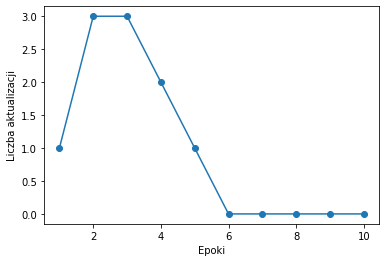

In [18]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
                                    # range(od, do, co ile-domyślnie 1)  
plt.xlabel('Epoki')
plt.ylabel('Liczba aktualizacji')
plt.show()